# PyCity Schools Analysis

- In this brief analysis, we are observing trends within a city's school system. We are given dataframe containing student names, schools, reading and math scores, school type, and school budget. In this analysis, I grouped the schools by name and districts and taken the average reading/ math scores to assess school performance. Here, overall performance was assessed by determining the number of students who scored above 70 on their math and reading exams. The budget per student was also calculated by taking the total school budget and dividing by the total student population.

- In this analysis, of the 15 schools, I have found that students in charter schools tend to perform better overall in this city. However, when looking at the allocated budgets overall there seems to be an inverse effect on performance. As budget per student increases, performance tends to decrease. The lowest performing schools had a budget of about 650 dollars per student and above, where as most of the highest performing schools had a budget below 635 dollars per student.

- Interestingly, there does seem to be a trend between school size and student performance. The top performing schools had less than 2500 students, whereas the bottom performing had over 2900 students. The worst performing school had the largest student population of all school systems with 4761 students.

- For more insight, check the README file.
  
---

In [1]:
# Dependencies and Setup
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

# Read School and Student Data File and store into Pandas DataFrames
school_df = pd.read_csv('Resources/schools_complete.csv')
student_df = pd.read_csv('Resources/students_complete.csv')
# print(school_df.head())
# print(student_df.head())

# Combine the data into a single dataset.  
school_df_complete = pd.merge(student_df, school_df, how="left", on=["school_name", "school_name"])
# school_df_complete.describe()
# school_df_complete.columns
# school_df_complete.dtypes
school_df_complete.head(10)

# Diagnostics
# Split student names into last, first
# Remove grade suffix

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
7,7,Nicole Baker,F,12th,Huang High School,96,69,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635


## District Summary

In [2]:
# Calculate the total number of unique schools, 15
unique_schools = school_df_complete['school_name'].unique()
school_count = len(unique_schools)
school_count

# Num of districts
# school_count = school_df_complete['type'].unique()
# school_count

15

In [3]:
# Calculate the total number of students
school_df_complete.duplicated().describe()
student_count = len(school_df_complete['student_name'])
student_count

39170

In [4]:
# Calculate the total budget
unique_schools_df = school_df_complete.drop_duplicates(subset='school_name', keep='first')
unique_schools_df['budget'].sum()

# Method 2
total_budget = school_df_complete['budget'].unique().sum()
total_budget

24649428

In [5]:
# Calculate the average (mean) math score
average_math_score_district = school_df_complete['math_score'].mean()
average_math_score_district

78.98537145774827

In [6]:
# Calculate the average (mean) reading score
average_reading_score_district = school_df_complete['reading_score'].mean()
average_reading_score_district

81.87784018381414

In [7]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_df_complete[(school_df_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [8]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = school_df_complete[(school_df_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [9]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_df_complete[
    (school_df_complete["math_score"] >= 70) & (school_df_complete["reading_score"] >= 70)
    ].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [10]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary_list = [{
                    "Total Schools": school_count,
                    "Total Students": student_count,
                    "Total Budget": total_budget,
                    "Average Math Score": average_math_score_district,
                    "Average Reading Score": average_reading_score_district,
                    "% Passing Math": passing_math_percentage,
                    "% Passing Reading": passing_reading_percentage,
                    "% Overall Passing": overall_passing_rate}]

# Convert to pandas df
district_summary = pd.DataFrame(district_summary_list)

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [11]:
# Use the code provided to select all of the school types
school_types = school_df_complete['type'].unique()
school_types

array(['District', 'Charter'], dtype=object)

In [12]:
# Calculate the total student count per school
per_school_counts = []
for school in unique_schools:
    nested_dict = {}
    nested_dict["school_name"] = school
    nested_dict["students"] = (school_df_complete['school_name'] == school).sum()
    per_school_counts.append(nested_dict)
    
# Verify that the total matches previous total
# sum(per_school_counts.values())

# convert to df
per_school_counts_df = pd.DataFrame(per_school_counts)
# per_school_counts_df

# Add school type column
school_types_df = school_df_complete.drop_duplicates(subset='school_name', keep='first')
per_school_counts_df2 = pd.merge(per_school_counts_df, school_types_df[["school_name", "type"]], on="school_name")
per_school_counts_df2

,school_name,students,type
0,Huang High School,2917,District
1,Figueroa High School,2949,District
2,Shelton High School,1761,Charter
3,Hernandez High School,4635,District
4,Griffin High School,1468,Charter
5,Wilson High School,2283,Charter
6,Cabrera High School,1858,Charter
7,Bailey High School,4976,District
8,Holden High School,427,Charter
9,Pena High School,962,Charter


In [13]:
# Calculate the total school budget and per capita spending per school
school_budgets = unique_schools_df[['school_name', 'budget']].reset_index().drop('index', axis=1)
# school_budgets.head(15)

# Merge school_budgets and per_school_counts
school_budget_df = pd.merge(per_school_counts_df2, school_budgets, on='school_name')
# school_budget_df.head(15)

# Calculating budget per school student
school_budget_df['Per Student Budget'] = school_budget_df['budget']/ school_budget_df['students']
school_budget_df.head(15)

,school_name,students,type,budget,Per Student Budget
0,Huang High School,2917,District,1910635,655.0
1,Figueroa High School,2949,District,1884411,639.0
2,Shelton High School,1761,Charter,1056600,600.0
3,Hernandez High School,4635,District,3022020,652.0
4,Griffin High School,1468,Charter,917500,625.0
5,Wilson High School,2283,Charter,1319574,578.0
6,Cabrera High School,1858,Charter,1081356,582.0
7,Bailey High School,4976,District,3124928,628.0
8,Holden High School,427,Charter,248087,581.0
9,Pena High School,962,Charter,585858,609.0


In [14]:
# Calculate the average test scores per school

# Subframe for math score for each school 
avg_math_score_schools = school_df_complete.groupby(['school_name'])['math_score'].mean().reset_index()
avg_math_score_schools.columns = ['school_name', 'average_math_score']
avg_math_score_schools.head()

# Calculate average reading score per school
avg_reading_score_schools = school_df_complete.groupby(['school_name'])['reading_score'].mean().reset_index()
avg_reading_score_schools.columns = ['school_name', 'average_reading_score']
avg_reading_score_schools.head()

# Merge average scores into average_scores_per_school df
average_scores_per_school = pd.merge(avg_math_score_schools, avg_reading_score_schools, on='school_name')
average_scores_per_school.head(15)

,school_name,average_math_score,average_reading_score
0,Bailey High School,77.048432,81.033963
1,Cabrera High School,83.061895,83.975780
2,Figueroa High School,76.711767,81.158020
3,Ford High School,77.102592,80.746258
4,Griffin High School,83.351499,83.816757
5,Hernandez High School,77.289752,80.934412
6,Holden High School,83.803279,83.814988
7,Huang High School,76.629414,81.182722
8,Johnson High School,77.072464,80.966394
9,Pena High School,83.839917,84.044699


In [15]:
# Calculate the number of students per school with math scores of 70 or higher
# Probably better way to do this:
# I filtered all math scores above 70, then group by school, then count students remaining
passing_students_math = school_df_complete[school_df_complete['math_score'] >= 70 ].groupby('school_name').count()
passing_students_math.head(15)
type(passing_students_math)

# Used iloc to select a column and converted it into a new sub-df
passing_students_math_df = pd.DataFrame(passing_students_math.iloc[:, 1]).reset_index()
passing_students_math_df.columns = ['school_name', 'passing_students_in_math']             
passing_students_math_df

,school_name,passing_students_in_math
0,Bailey High School,3318
1,Cabrera High School,1749
2,Figueroa High School,1946
3,Ford High School,1871
4,Griffin High School,1371
5,Hernandez High School,3094
6,Holden High School,395
7,Huang High School,1916
8,Johnson High School,3145
9,Pena High School,910


In [16]:
# Calculate the number of students per school with reading scores of 70 or higher
# Probably better way to do this:
# I filtered all reading scores above 70, then group by school, then count students remaining
passing_students_reading = school_df_complete[school_df_complete['reading_score'] >= 70 ].groupby('school_name').count()
passing_students_reading.head(15)
type(passing_students_reading)

# Used iloc to select a column and converted it into a new sub-df
passing_students_reading_df = pd.DataFrame(passing_students_reading.iloc[:, 1]).reset_index()
passing_students_reading_df.columns = ['school_name', 'passing_students_in_reading']
passing_students_reading_df

# Merge math and reading into one df
passing_students_df = pd.merge(passing_students_math_df, passing_students_reading_df, on='school_name')
# Merge budgets with passing_students_df
student_summary_df = pd.merge(passing_students_df, school_budget_df, on='school_name')
# Merge average_score_per_school
student_summary_df = pd.merge(student_summary_df, average_scores_per_school, on='school_name')
student_summary_df

,school_name,passing_students_in_math,passing_students_in_reading,students,type,budget,Per Student Budget,average_math_score,average_reading_score
0,Bailey High School,3318,4077,4976,District,3124928,628.0,77.048432,81.033963
1,Cabrera High School,1749,1803,1858,Charter,1081356,582.0,83.061895,83.975780
2,Figueroa High School,1946,2381,2949,District,1884411,639.0,76.711767,81.158020
3,Ford High School,1871,2172,2739,District,1763916,644.0,77.102592,80.746258
4,Griffin High School,1371,1426,1468,Charter,917500,625.0,83.351499,83.816757
5,Hernandez High School,3094,3748,4635,District,3022020,652.0,77.289752,80.934412
6,Holden High School,395,411,427,Charter,248087,581.0,83.803279,83.814988
7,Huang High School,1916,2372,2917,District,1910635,655.0,76.629414,81.182722
8,Johnson High School,3145,3867,4761,District,3094650,650.0,77.072464,80.966394
9,Pena High School,910,923,962,Charter,585858,609.0,83.839917,84.044699


In [17]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_df_complete[
    (school_df_complete["reading_score"] >= 70) & (school_df_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
# Reset index and establish df
school_students_passing_math_and_reading_df = school_students_passing_math_and_reading.reset_index()
school_students_passing_math_and_reading_df.columns = ["school_name", "students_passing_math_and_reading"]
school_students_passing_math_and_reading_df

# Merge with summary df
student_summary_df = pd.merge(student_summary_df, school_students_passing_math_and_reading_df, on='school_name')
student_summary_df

,school_name,passing_students_in_math,passing_students_in_reading,students,type,budget,Per Student Budget,average_math_score,average_reading_score,students_passing_math_and_reading
0,Bailey High School,3318,4077,4976,District,3124928,628.0,77.048432,81.033963,2719
1,Cabrera High School,1749,1803,1858,Charter,1081356,582.0,83.061895,83.975780,1697
2,Figueroa High School,1946,2381,2949,District,1884411,639.0,76.711767,81.158020,1569
3,Ford High School,1871,2172,2739,District,1763916,644.0,77.102592,80.746258,1487
4,Griffin High School,1371,1426,1468,Charter,917500,625.0,83.351499,83.816757,1330
5,Hernandez High School,3094,3748,4635,District,3022020,652.0,77.289752,80.934412,2481
6,Holden High School,395,411,427,Charter,248087,581.0,83.803279,83.814988,381
7,Huang High School,1916,2372,2917,District,1910635,655.0,76.629414,81.182722,1561
8,Johnson High School,3145,3867,4761,District,3094650,650.0,77.072464,80.966394,2549
9,Pena High School,910,923,962,Charter,585858,609.0,83.839917,84.044699,871


In [18]:
# Use the provided code to calculate the passing rates
# Modified the code
student_summary_df["school_passing_rate_math"] = student_summary_df["passing_students_in_math"] / student_summary_df["students"] * 100
student_summary_df["school_passing_rate_reading"] = student_summary_df["passing_students_in_reading"] / student_summary_df["students"] * 100
student_summary_df["overall_passing_rate"] = student_summary_df["students_passing_math_and_reading"] / student_summary_df["students"] * 100
student_summary_df

,school_name,passing_students_in_math,passing_students_in_reading,students,type,budget,Per Student Budget,average_math_score,average_reading_score,students_passing_math_and_reading,school_passing_rate_math,school_passing_rate_reading,overall_passing_rate
0,Bailey High School,3318,4077,4976,District,3124928,628.0,77.048432,81.033963,2719,66.680064,81.933280,54.642283
1,Cabrera High School,1749,1803,1858,Charter,1081356,582.0,83.061895,83.975780,1697,94.133477,97.039828,91.334769
2,Figueroa High School,1946,2381,2949,District,1884411,639.0,76.711767,81.158020,1569,65.988471,80.739234,53.204476
3,Ford High School,1871,2172,2739,District,1763916,644.0,77.102592,80.746258,1487,68.309602,79.299014,54.289887
4,Griffin High School,1371,1426,1468,Charter,917500,625.0,83.351499,83.816757,1330,93.392371,97.138965,90.599455
5,Hernandez High School,3094,3748,4635,District,3022020,652.0,77.289752,80.934412,2481,66.752967,80.862999,53.527508
6,Holden High School,395,411,427,Charter,248087,581.0,83.803279,83.814988,381,92.505855,96.252927,89.227166
7,Huang High School,1916,2372,2917,District,1910635,655.0,76.629414,81.182722,1561,65.683922,81.316421,53.513884
8,Johnson High School,3145,3867,4761,District,3094650,650.0,77.072464,80.966394,2549,66.057551,81.222432,53.539172
9,Pena High School,910,923,962,Charter,585858,609.0,83.839917,84.044699,871,94.594595,95.945946,90.540541


In [19]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = student_summary_df
per_school_summary

# Formatting
per_school_summary["budget"] = per_school_summary["budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Cleaning up columns to match example chart
per_school_summary = per_school_summary.reindex(columns=["school_name", "type", "students", "budget", 
                                                         "Per Student Budget","average_math_score", 
                                                         "average_reading_score", "school_passing_rate_math",
                                                         "school_passing_rate_reading", "overall_passing_rate"])
per_school_summary.columns = ["School", "School Type", "Total Students", "Total School Budget", "Per Student Budget",
                             "Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", 
                             "% Overall Passing"]

# Display the DataFrame
per_school_summary

,School,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
6,Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Highest-Performing Schools (by % Overall Passing)

In [20]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values(by="% Overall Passing", ascending=False)
top_schools.head(5)

,School,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
12,Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
13,Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [21]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values(by="% Overall Passing", ascending=True)
bottom_schools.head(5)

,School,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
10,Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [22]:
# Use the code provided to separate the data by grade
ninth_graders = school_df_complete[(school_df_complete["grade"] == "9th")]
tenth_graders = school_df_complete[(school_df_complete["grade"] == "10th")]
eleventh_graders = school_df_complete[(school_df_complete["grade"] == "11th")]
twelfth_graders = school_df_complete[(school_df_complete["grade"] == "12th")]
# twelfth_graders

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby("school_name")['math_score'].mean().reset_index()
ninth_grade_math_scores.columns = ["school_name", "ninth_grade_math_avg"]
tenth_grader_math_scores = tenth_graders.groupby("school_name")['math_score'].mean().reset_index()
tenth_grader_math_scores.columns = ["school_name", "tenth_grade_math_avg"]
eleventh_grader_math_scores = eleventh_graders.groupby("school_name")['math_score'].mean().reset_index()
eleventh_grader_math_scores.columns = ["school_name", "eleventh_grade_math_avg"]
twelfth_grader_math_scores = twelfth_graders.groupby("school_name")['math_score'].mean().reset_index()
twelfth_grader_math_scores.columns = ["school_name", "twelfth_grade_math_avg"]
# twelfth_grader_math_scores


# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade_sub1 = pd.merge(ninth_grade_math_scores, tenth_grader_math_scores, on="school_name")
math_scores_by_grade_sub2 = pd.merge(eleventh_grader_math_scores, twelfth_grader_math_scores, on="school_name")
math_scores_by_grade = pd.merge(math_scores_by_grade_sub1, math_scores_by_grade_sub2, on="school_name")
# math_scores_by_grade

# Minor data wrangling
# Not sure what this is supposed to do...
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,school_name,ninth_grade_math_avg,tenth_grade_math_avg,eleventh_grade_math_avg,twelfth_grade_math_avg
0,Bailey High School,77.083676,76.996772,77.515588,76.492218
1,Cabrera High School,83.094697,83.154506,82.765560,83.277487
2,Figueroa High School,76.403037,76.539974,76.884344,77.151369
3,Ford High School,77.361345,77.672316,76.918058,76.179963
4,Griffin High School,82.044010,84.229064,83.842105,83.356164
5,Hernandez High School,77.438495,77.337408,77.136029,77.186567
6,Holden High School,83.787402,83.429825,85.000000,82.855422
7,Huang High School,77.027251,75.908735,76.446602,77.225641
8,Johnson High School,77.187857,76.691117,77.491653,76.863248
9,Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_df_complete[(school_df_complete["grade"] == "9th")]
tenth_graders = school_df_complete[(school_df_complete["grade"] == "10th")]
eleventh_graders = school_df_complete[(school_df_complete["grade"] == "11th")]
twelfth_graders = school_df_complete[(school_df_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby("school_name")['reading_score'].mean().reset_index()
ninth_grade_reading_scores.columns = ["school_name", "ninth_grade_reading_avg"]
tenth_grader_reading_scores = tenth_graders.groupby("school_name")['reading_score'].mean().reset_index()
tenth_grader_reading_scores.columns = ["school_name", "tenth_grade_reading_avg"]
eleventh_grader_reading_scores = eleventh_graders.groupby("school_name")['reading_score'].mean().reset_index()
eleventh_grader_reading_scores.columns = ["school_name", "eleventh_grade_reading_avg"]
twelfth_grader_reading_scores = twelfth_graders.groupby("school_name")['reading_score'].mean().reset_index()
twelfth_grader_reading_scores.columns = ["school_name", "twelfth_grade_reading_avg"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade_sub1 = pd.merge(ninth_grade_reading_scores, tenth_grader_reading_scores, on="school_name")
reading_scores_by_grade_sub2 = pd.merge(eleventh_grader_reading_scores, twelfth_grader_reading_scores, on="school_name")
reading_scores_by_grade = pd.merge(reading_scores_by_grade_sub1, reading_scores_by_grade_sub2, on="school_name")

# Minor data wrangling
# reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,school_name,ninth_grade_reading_avg,tenth_grade_reading_avg,eleventh_grade_reading_avg,twelfth_grade_reading_avg
0,Bailey High School,81.303155,80.907183,80.945643,80.912451
1,Cabrera High School,83.676136,84.253219,83.788382,84.287958
2,Figueroa High School,81.198598,81.408912,80.640339,81.384863
3,Ford High School,80.632653,81.262712,80.403642,80.662338
4,Griffin High School,83.369193,83.706897,84.288089,84.013699
5,Hernandez High School,80.866860,80.660147,81.396140,80.857143
6,Holden High School,83.677165,83.324561,83.815534,84.698795
7,Huang High School,81.290284,81.512386,81.417476,80.305983
8,Johnson High School,81.260714,80.773431,80.616027,81.227564
9,Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [24]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [25]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()

In [26]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df.dtypes
school_spending_df.psb = pd.to_numeric(school_spending_df['Per Student Budget'].replace('[\$,]', '', regex=True))
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(x=school_spending_df.psb, bins=spending_bins, labels=labels, include_lowest=False)
school_spending_df

/var/folders/_j/g4pw0jf17gq2w8c26hbhq5l80000gn/T/ipykernel_41705/2959045052.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  school_spending_df.psb = pd.to_numeric(school_spending_df['Per Student Budget'].replace('[\$,]', '', regex=True))


,School,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
6,Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-630


In [27]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()



In [28]:
# Assemble into DataFrame
spending_summary_1 = pd.merge(spending_math_scores, spending_reading_scores, on="Spending Ranges (Per Student)")
spending_summary_2 = pd.merge(spending_passing_math, spending_passing_reading, on="Spending Ranges (Per Student)")
spending_summary_3 = pd.merge(spending_summary_1, spending_summary_2, on="Spending Ranges (Per Student)")
spending_summary = pd.merge(spending_summary_3, overall_passing_spending, on="Spending Ranges (Per Student)")

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [29]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [30]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(x=per_school_summary["Total Students"], bins=size_bins, labels=labels)
per_school_summary

,School,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
6,Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [31]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = per_school_summary.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = per_school_summary.groupby(["School Size"])["% Overall Passing"].mean()

In [32]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary_1 = pd.merge(size_math_scores, size_reading_scores, on="School Size")
size_summary_2 = pd.merge(size_passing_math, size_passing_reading, on="School Size")
size_summary_3 = pd.merge(size_summary_1, size_summary_2, on="School Size")
size_summary = pd.merge(size_summary_3, size_overall_passing, on="School Size")

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [33]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()

In [34]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary_1 = pd.merge(average_math_score_by_type, average_reading_score_by_type, on="School Type")
type_summary_2 = pd.merge(average_percent_passing_math_by_type, average_percent_passing_reading_by_type, on="School Type")
type_summary_3 = pd.merge(type_summary_1, type_summary_2, on="School Type")
type_summary = pd.merge(type_summary_3, average_percent_overall_passing_by_type, on="School Type")

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


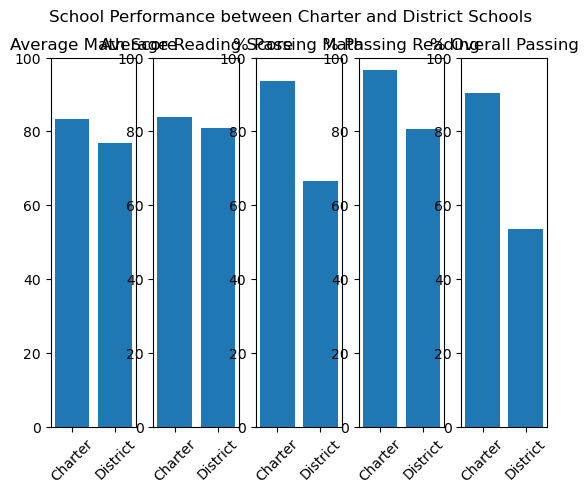

In [35]:
plt.suptitle(t="School Performance between Charter and District Schools")
plt.subplot(1, 5, 1)
plt.title("Average Math Score")
plt.bar(x=type_summary.index, height=type_summary['Average Math Score'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.subplot(1, 5, 2)
plt.title("Average Reading Score")
plt.bar(x=type_summary.index, height=type_summary['Average Reading Score'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.subplot(1, 5, 3)
plt.title("% Passing Math")
plt.bar(x=type_summary.index, height=type_summary['% Passing Math'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.subplot(1, 5, 4)
plt.title("% Passing Reading")
plt.bar(x=type_summary.index, height=type_summary['% Passing Reading'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.subplot(1, 5, 5)
plt.title("% Overall Passing")
plt.bar(x=type_summary.index, height=type_summary['% Overall Passing'])
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()